# HW6 due 11:30a Mon Nov 21

# Linear DE flow

a. Show that the flow of $x^+ = A x$, $x\in\mathbb{R}^d$, is given by
$$\forall t\in\mathbb{N},\ \xi\in\mathbb{R}^d : \phi(t,\xi) = A^t \xi.$$

We'll prove this by induction.

It's clear that $\phi(0,\xi) = \xi$, so the base case is satisfied.

It's also clear that $\phi(t+1,\xi) = A \phi(t,\xi)$ for all $t\in\mathbb{N},\ \xi\in\mathbb{R}^d$, i.e. $\phi$ satisfies the DE $x^+ = A x$, so the inductive step holds.

We conclude that $\phi$ is the flow for the linear DE $x^+ = A x$.

b. Show that the flow of $\dot{x} = A x$, $x\in\mathbb{R}^d$, is given by
$$\forall t\in\mathbb{R},\ \xi\in\mathbb{R}^d : \phi(t,\xi) = e^{A t} \xi.$$

Observe that for all $t\in\mathbb{R},\ \xi\in\mathbb{R}^d$ we have $D_t \phi(t,\xi) = D_t [e^{A t} \xi] = D_t e^{A t} \xi.$

To compute $D_t e^{A t}$, we use the power series definition:
$$D_t e^{A t} = D_t \left[ \sum_{\ell=0}^\infty \frac{t^\ell}{\ell!} A^\ell \right] = \sum_{\ell=1}^\infty \frac{\ell t^{\ell-1}}{\ell!} A^\ell = A \sum_{\ell=1}^\infty \frac{t^{\ell-1}}{(\ell-1)!} A^{\ell-1} = A \sum_{\ell=0}^\infty \frac{t^\ell}{\ell!} A^\ell = A e^{A t}. $$

We conclude that for all $t\in\mathbb{R},\ \xi\in\mathbb{R}^d$ we have $D_t \phi(t,\xi) = A \phi(t,\xi)$, so $\phi$ is the flow for the linear DE $\dot{x} = A x$.

# Asteroids flow

a. Simulate an "interesting" nonequilibrium trajectory for the asteroids ship control system for an "interesting" amount of time; you may wish to apply a nonzero input.  Plot an "interesting" state (or function of state) versus time.

Let $x(0)\in\mathbb{R}^d$ denote the initial condition from (a.), and define it as

$$x(0) = \begin{bmatrix}
 -5\\0\\0\\3\\0
\end{bmatrix}$$

In $x(0)$, the ship is moving at a velocity of $3$ distance units per second, orthogonal to the direction of the spaceship heading. Now let's define our input as

$$u(t) = \begin{bmatrix}
 1.8\\-0.6
\end{bmatrix}$$

Where the input acceleration is 1.8 distance units per second squared, and the rotational velocity is -0.6 radians per second.

In [485]:
%run _547
%matplotlib inline

Now let's set up some simulation parameters

In [521]:
# let's remove drag for this simulation

# initial condition x(0)

x_0 = np.array([-5, 0, 0, 3, 0])

# simulation run time
t = 20*np.pi/3

def f(x):
    x1,x2,v1,v2,theta = x # position, velocity, angle
    u1 =  1.8
    u2 = -0.6
    a1 = u1*(np.cos(theta))
    a2 = u1*(np.sin(theta))
    return np.array([v1,v2,a1,a2,u2])
def h(x):
    x1,x2,v1,v2,theta = x # position, velocity, angle
    return np.array([x1,x2,theta])

Now define the simulation algorithm.

In [522]:
def sim(f,t,x,dt=1e-4):
    j,t_,x_= 0,[0],[x],
    while j*dt < t:
        t_.append((j+1)*dt)
        x_.append(x_[-1] + dt*f(x_[-1]))
        j += 1
    return np.array(t_),np.array(x_)

Let's run it!

In [523]:
x = x_0
t_,x_ = sim(f,t,x, dt =1e-4)

And plot the position trajectory.

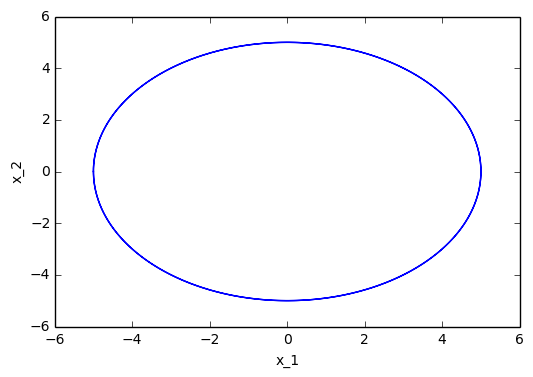

In [529]:
#print np.shape(x_)
#print np.shape(t_)
#plt.plot(t_, x_[:,0])
plt.plot(x_[:,0], x_[:,1])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

b. Choose an "interesting" direction $v\in\mathbb{R}^d$ along which to vary the initial condition.  Using the same input and time horizon from (a.), simulate the asteroids ship control system from an initial condition of the form $x(0) + \alpha v$, where $\alpha\in\mathbb{R}$.  Repeat for several additional values of $\alpha$ (don't change $v$ or $x(0)$).  Plot the "interesting" state (or function of state) from (a.) versus time for each of these trajectories (put all the simulation traces on the same plot).

Let's consider changing the initial horizontal velocity, that is let 

$$v = \begin{bmatrix}
 0\\0\\1\\0\\0
\end{bmatrix}$$

And consider the position trajectories when $\alpha = -0.5, -0.25, 0.25$ and $0.5$. 

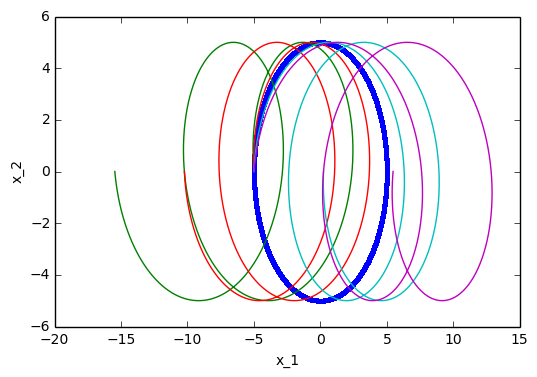

In [525]:
v = np.array([0, 0, 1, 0, 0])
x1 = x_0-0.5*v
x2 = x_0-0.25*v
x3 = x_0+0.25*v
x4 = x_0+0.5*v

x = x1
t_,x_1 = sim(f,t,x, dt =1e-4)

x = x2
t_,x_2 = sim(f,t,x, dt =1e-4)

x = x3
t_,x_3 = sim(f,t,x, dt =1e-4)

x = x4
t_,x_4 = sim(f,t,x, dt =1e-4)

plt.plot(x_[:,0], x_[:,1], '.-')
plt.plot(x_1[:,0], x_1[:,1])
plt.plot(x_2[:,0], x_2[:,1])
plt.plot(x_3[:,0], x_3[:,1])
plt.plot(x_4[:,0], x_4[:,1])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

Now let's view the horizontal positions vs time:

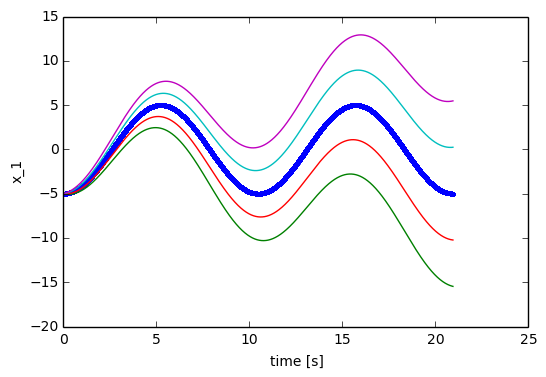

In [527]:
plt.plot(t_,x_[:,0], '.-')
plt.plot(t_,x_1[:,0])
plt.plot(t_,x_2[:,0])
plt.plot(t_,x_3[:,0])
plt.plot(t_,x_4[:,0])
plt.xlabel('time [s]')
plt.ylabel('x_1')
plt.show()

c. Consider the derivative of the trajectory outcome at the final time with respect to the parameter $\alpha$,
$$ D_\alpha \phi(t,x(0) + \alpha v,u).$$
What is the shape of this Jacobian matrix?  Provide a 1-sentence plain-language explanation for what this matrix means in terms of the behavior of the asteroids control system.

The Jacobian matrix will be a column vector where the number of rows equals the dimension of the state (5). The components of this vector provide a first-order approximation for how the final states vary with respect to a perturbation in the initial condition in the $v$ direction. 

d. Numerically compute the derivative of the trajectory outcome at the final time with respect to the parameter $\alpha$,
$$ D_\alpha \phi(t,x(0) + \alpha v,u),$$
using finite differences.  Provide a plot that demonstrates you used an appropriate displacement parameter for the finite differences calculation.  With reference to your 1-sentence explanation from (c.), provide an interpretation for the numbers you computed in the context of the asteroids control system.

For this, let's first consider when there is no initial condition perturbation. 

In [544]:
x = x_0
t_,x0 = sim(f,t,x, dt =1e-4)
print x0[np.shape(x0)[0]-1,:]

[ -4.99811505e+00   1.46946572e-04   8.81568171e-05   3.00000000e+00
  -1.25664000e+01]


$$\phi\left(\frac{20\pi}{3},x(0),u\right) = \begin{bmatrix}
 -4.9981\\0.00014695\\0.000088157\\3\\-12.5664
\end{bmatrix}$$

No consider when $\alpha = 0.001$, then

In [545]:
xa1 = x_0+0.001*v
x = xa1
t_,x_a1 = sim(f,t,x, dt =1e-4)
print x_a1[np.shape(x_a1)[0]-1,:]

[ -4.97717105e+00   1.46946572e-04   1.08815682e-03   3.00000000e+00
  -1.25664000e+01]


$$\phi\left(\frac{20\pi}{3},x(0) + \alpha v,u\right) = \begin{bmatrix}
 -4.9772\\0.00014695\\-.00091184\\3\\-12.5664
\end{bmatrix}$$

and further, when $\alpha = -0.001$

In [547]:
xa2 = x_0-0.001*v
x = xa2
t_,x_a2 = sim(f,t,x, dt =1e-4)
print x_a2[np.shape(x_a2)[0]-1,:]

[ -5.01905905e+00   1.46946572e-04  -9.11843183e-04   3.00000000e+00
  -1.25664000e+01]


$$\phi\left(\frac{20\pi}{3},x(0) - \alpha v,u\right) = \begin{bmatrix}
 -5.1906\\0.00014695\\-.00091184\\3\\-12.5664
\end{bmatrix}$$

Proceeding with calculating a finite difference, consider that:

In [559]:
print x_a1[np.shape(x_a1)[0]-1,:] - x_a2[np.shape(x_a2)[0]-1,:]
Dphi =(x_a1[np.shape(x_a1)[0]-1,:] - x_a2[np.shape(x_a2)[0]-1,:])/0.002
print Dphi

[ 0.041888  0.        0.002     0.        0.      ]
[ 20.944   0.      1.      0.      0.   ]


$$ D_\alpha \phi(t,x(0) + \alpha v,u) \approx \frac{\phi\left(\frac{20\pi}{3},x(0)+\alpha v,u\right) - \phi\left(\frac{20\pi}{3},x(0)- \alpha v,u\right)}{2\alpha} = \begin{bmatrix}
 20.944\\0\\1\\0\\0
\end{bmatrix}$$

Now let's verify that our finite differences calculations yielded suitable results.

In [560]:
# we've already run the simulation for alpha = 0.5,-0.25, 0, 0.25, 0.5. Let's run a few more for alpha = -1, -0.75, 0.75, 1
xd1 = x_0-1*v
xd2 = x_0-0.75*v
xd3 = x_0+0.75*v
xd4 = x_0+1*v

x = xd1
t_,xd_1 = sim(f,t,x, dt =1e-4)

x = xd2
t_,xd_2 = sim(f,t,x, dt =1e-4)

x = xd3
t_,xd_3 = sim(f,t,x, dt =1e-4)

x = xd4
t_,xd_4 = sim(f,t,x, dt =1e-4)

We will now examine the final states and see how good our derivative calculation was.

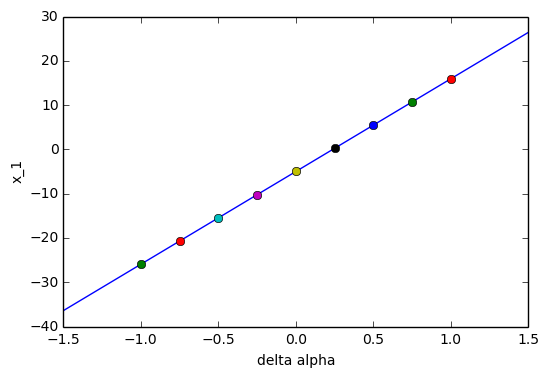

In [583]:
# Now let's consider the first state
state = 1

x = [-1.5, 1.5]
y =[-1.5*Dphi[state-1]+x0[np.shape(x0)[0]-1,state-1], 1.5*Dphi[state-1]+x0[np.shape(x0)[0]-1,state-1]]
plt.plot(x,y)

plt.plot(-1,xd_1[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.75,xd_2[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.5,x_1[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.25,x_2[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0,x_[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.25,x_3[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.5,x_4[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.75,xd_3[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(1,xd_4[np.shape(x_1)[0]-1,state-1], 'o')

plt.xlabel('delta alpha')
plt.ylabel('x_1')

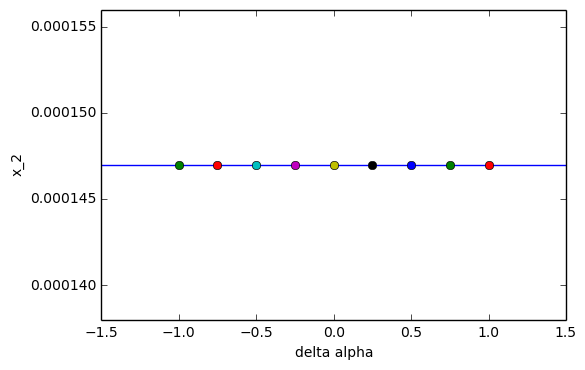

In [576]:
# Now let's consider the second state

state = 2

x = [-1.5, 1.5]
y =[-1.5*Dphi[state-1]+x0[np.shape(x0)[0]-1,state-1], 1.5*Dphi[state-1]+x0[np.shape(x0)[0]-1,state-1]]
plt.plot(x,y)

plt.plot(-1,xd_1[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.75,xd_2[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.5,x_1[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.25,x_2[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0,x_[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.25,x_3[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.5,x_4[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.75,xd_3[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(1,xd_4[np.shape(x_1)[0]-1,state-1], 'o')

plt.xlabel('delta alpha')
plt.ylabel('x_2')

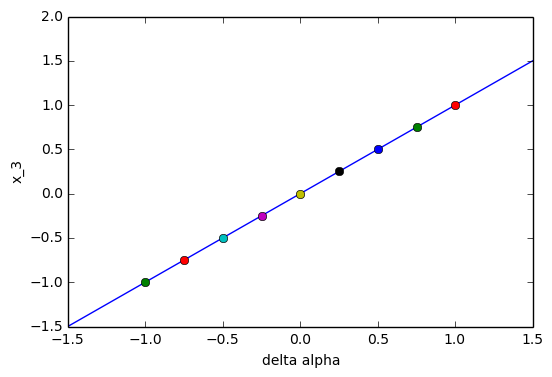

In [584]:
# Now let's consider the third state

state = 3

x = [-1.5, 1.5]
y =[-1.5*Dphi[state-1]+x0[np.shape(x0)[0]-1,state-1], 1.5*Dphi[state-1]+x0[np.shape(x0)[0]-1,state-1]]
plt.plot(x,y)

plt.plot(-1,xd_1[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.75,xd_2[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.5,x_1[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.25,x_2[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0,x_[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.25,x_3[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.5,x_4[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.75,xd_3[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(1,xd_4[np.shape(x_1)[0]-1,state-1], 'o')

plt.xlabel('delta alpha')
plt.ylabel('x_3')

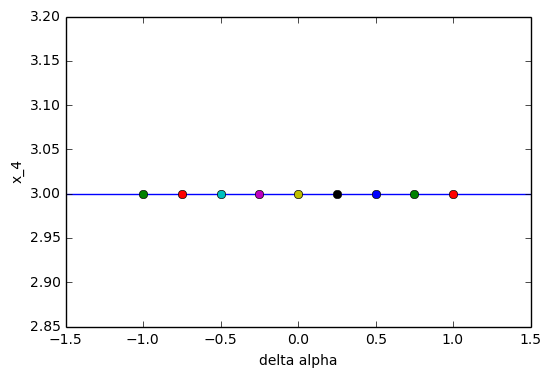

In [585]:
# Now let's consider the fourth state

state = 4

x = [-1.5, 1.5]
y =[-1.5*Dphi[state-1]+x0[np.shape(x0)[0]-1,state-1], 1.5*Dphi[state-1]+x0[np.shape(x0)[0]-1,state-1]]
plt.plot(x,y)

plt.plot(-1,xd_1[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.75,xd_2[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.5,x_1[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.25,x_2[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0,x_[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.25,x_3[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.5,x_4[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.75,xd_3[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(1,xd_4[np.shape(x_1)[0]-1,state-1], 'o')

plt.xlabel('delta alpha')
plt.ylabel('x_4')

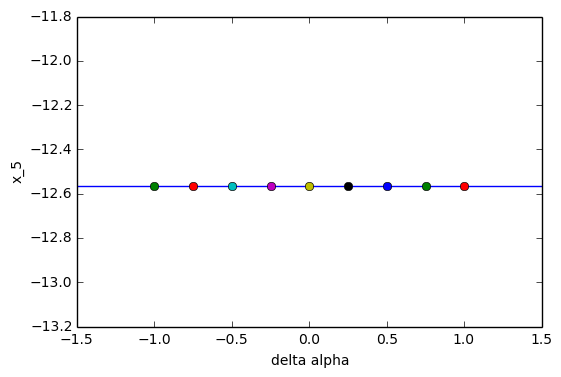

In [586]:
# Now let's consider the fifth state

state = 5

x = [-1.5, 1.5]
y =[-1.5*Dphi[state-1]+x0[np.shape(x0)[0]-1,state-1], 1.5*Dphi[state-1]+x0[np.shape(x0)[0]-1,state-1]]
plt.plot(x,y)

plt.plot(-1,xd_1[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.75,xd_2[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.5,x_1[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(-0.25,x_2[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0,x_[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.25,x_3[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.5,x_4[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(0.75,xd_3[np.shape(x_1)[0]-1,state-1], 'o')
plt.plot(1,xd_4[np.shape(x_1)[0]-1,state-1], 'o')

plt.xlabel('delta alpha')
plt.ylabel('x_5')

We see that the state trajectory of our sampled $\alpha$ values correspond well with our derivative calculations. When we perturb our initial condition in the $v$ direction, the only states affected at time $t$ are the spaceship's horizontal position and horizontal velocity. In particular, as compared to the case of no pertubration, for any $\alpha \in \mathbb{R}$, the horizontal velocity at time $t$ will increase by $\alpha$. Similarly, the horizontal position will be displaced by $t\alpha$. The orientation and vertical components of the spaceship configuration are unaffected.

# Project flow

a. Simulate an "interesting" nonequilibrium trajectory for your project control system; you may wish to apply a nonzero input.  Plot an "interesting" state (or function of state) versus time.

Let $x(0)\in\mathbb{R}^d$ denote the initial condition from (a.).

b. Choose an "interesting" direction $v\in\mathbb{R}^d$ along which to vary the initial condition.  Using the same input from (a.), simulate your project control system from an initial condition of the form $x(0) + \alpha v$, where $\alpha\in\mathbb{R}$.  Repeat for several additional values of $\alpha$ (don't change $v$ or $x(0)$).  Plot the "interesting" state (or function of state) from (a.) versus time for each of these trajectories (put all the simulation traces on the same plot).

c. Consider the derivative of the trajectory outcome at the final time with respect to the parameter $\alpha$,
$$ D_\alpha \phi(t,x(0) + \alpha v,u).$$
What is the shape of this Jacobian matrix?  Provide a 1-sentence plain-language explanation for what this matrix means in terms of the behavior of your project control system.

d. Numerically compute the derivative of the trajectory outcome at the final time with respect to the parameter $\alpha$,
$$ D_\alpha \phi(t,x(0) + \alpha v,u),$$
using finite differences.  Provide a plot that demonstrates you used an appropriate displacement parameter for the finite differences calculation.  With reference to your 1-sentence explanation from (c.), provide an interpretation for the numbers you computed in the context of your project control system.